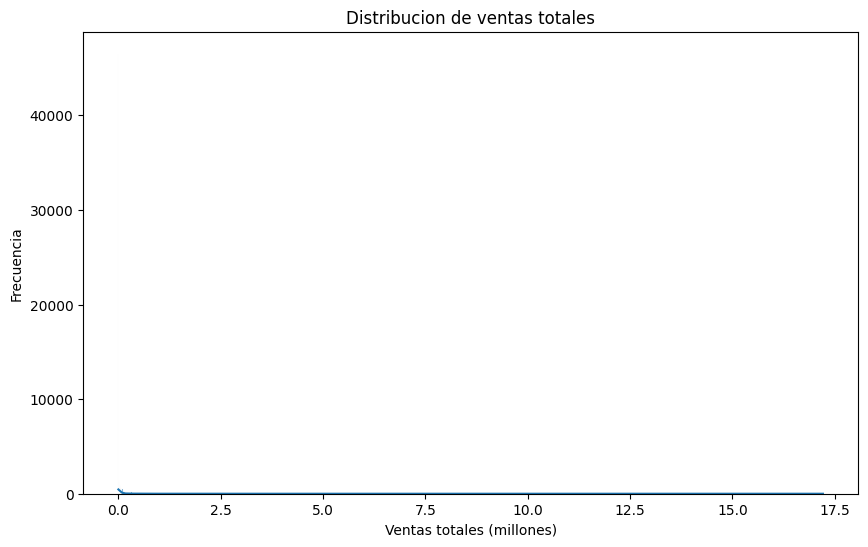

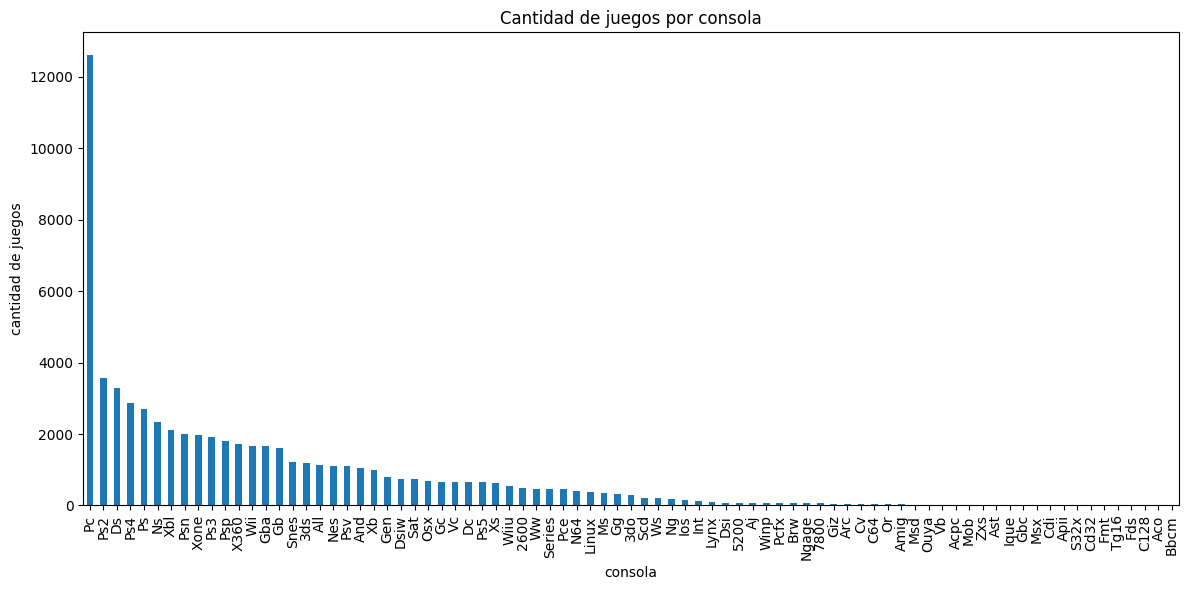

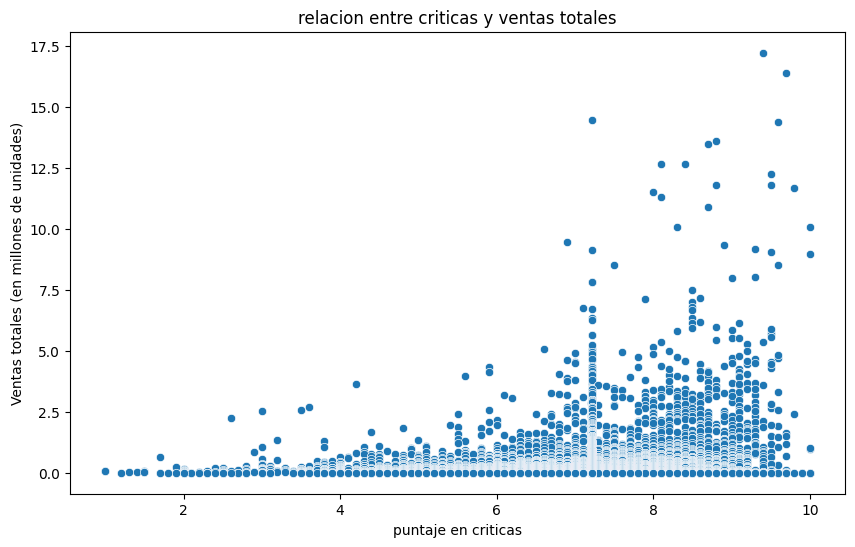

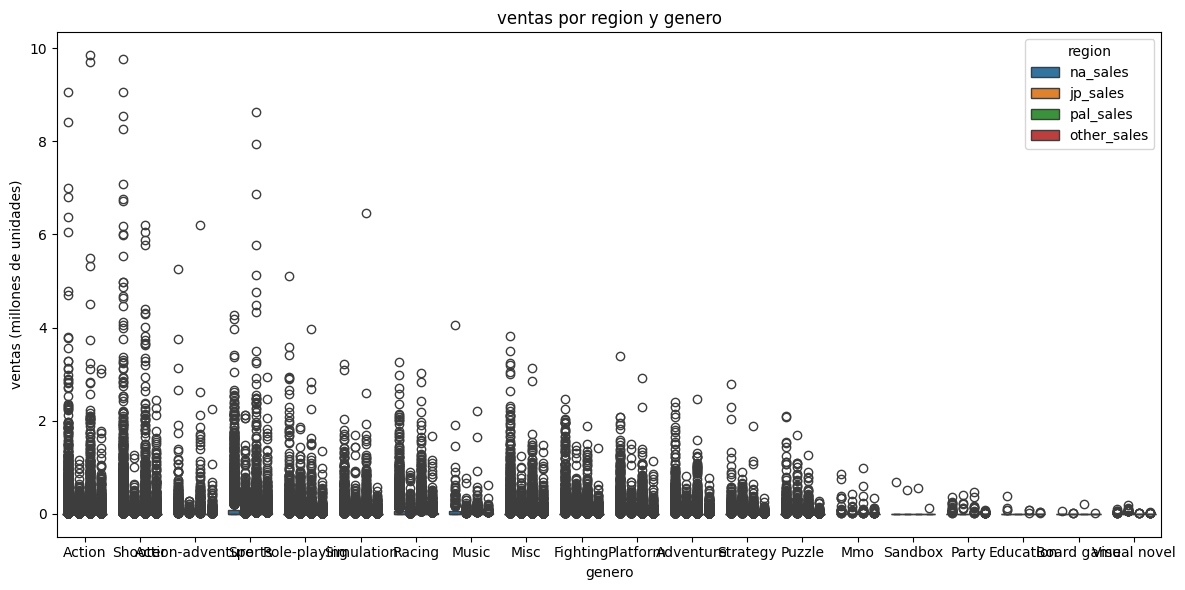


Algunas conclusiones en base a los datos:

genero más común: Misc
consola con más juegos: Pc

Correlacion de Pearson

              critic_score  total_sales  na_sales  jp_sales  pal_sales  \
critic_score      1.000000     0.140937  0.129877  0.044589   0.127616   
total_sales       0.140937     1.000000  0.932062  0.294413   0.899107   
na_sales          0.129877     0.932062  1.000000  0.117330   0.719019   
jp_sales          0.044589     0.294413  0.117330  1.000000   0.160707   
pal_sales         0.127616     0.899107  0.719019  0.160707   1.000000   
other_sales       0.123929     0.824652  0.716735  0.174479   0.832800   

              other_sales  
critic_score     0.123929  
total_sales      0.824652  
na_sales         0.716735  
jp_sales         0.174479  
pal_sales        0.832800  
other_sales      1.000000  

Correlacion de Spearman

              critic_score  total_sales  na_sales  jp_sales  pal_sales  \
critic_score      1.000000     0.016507  0.013260  0.047099   0.03

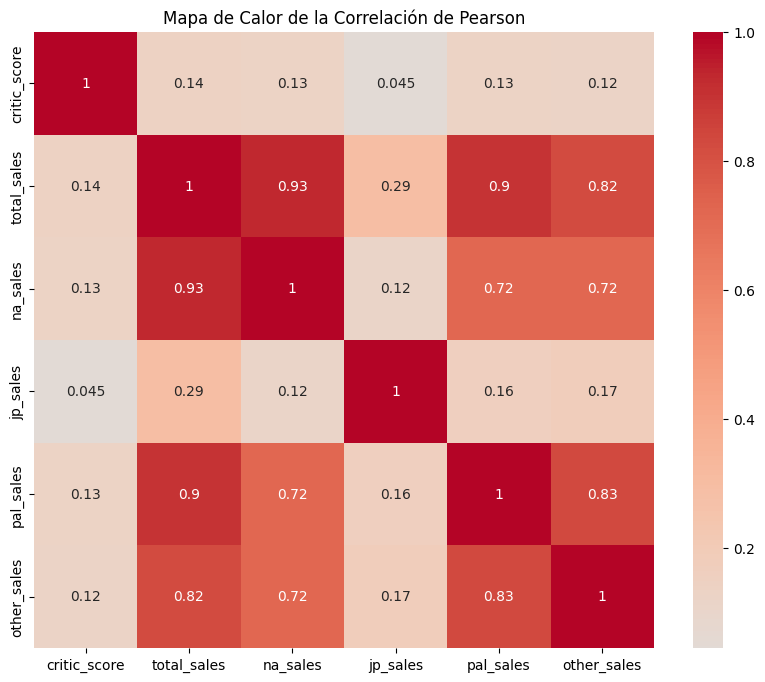

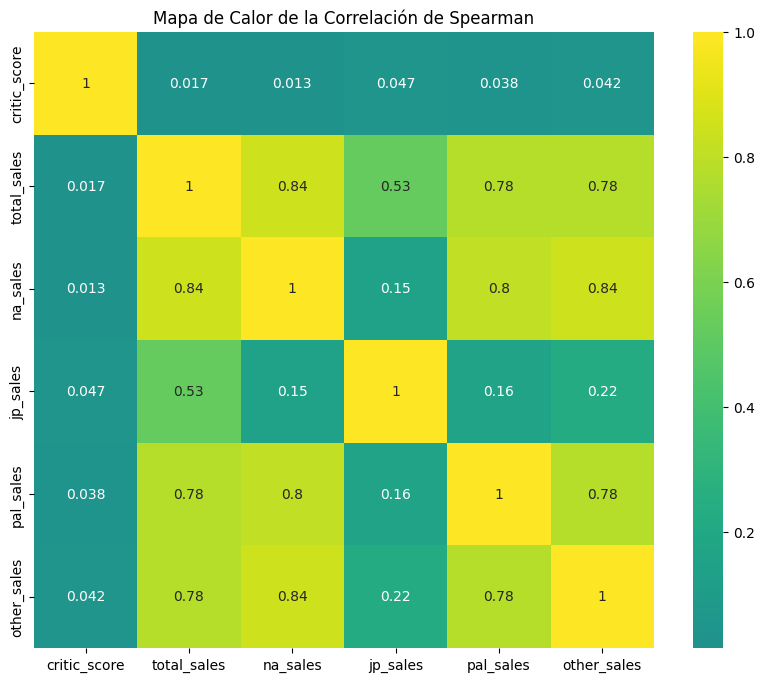

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# se realiza la siguiente importacion de manera a ignorar un warning de tipo FutureWarning que sera cambiado en pandas 3.0
# ocurre al usar el atributo inplace=True 
# se encontro esa solucion en: https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def mostrar_informacion_dataset(df):
    df.info()


def mostrar_valores_vacios(df):
    nan_count = df.isna().sum()
    nan_columns = nan_count[nan_count > 0]

    if not nan_columns.empty:
        print("columnas con valores vacios:")
        print(nan_columns)
    else:
        print("no hay valores vacios")


def limpieza_datos(df):
    '''
    Metodo que agrupa todas las operaciones de limpiezade datos que se solicita en el enunciado, se utilizaron algunos metodos de conversion aprendidas en otras fuentes
        https://www.geeksforgeeks.org/python-pandas-to_numeric-method/ (metodo to_numeric)
        https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.to_datetime.html (metodo to_datetime)

    Se uso ademas lo aprendido en clase y desarrollado en las tareas Core
    '''
    # Se eliminan las filas que sean duplicadas en todos los campos
    df.drop_duplicates(inplace=True)

    # Se castean los tipos de datos a los correctos especificados en el diccionario de datos
    # Se usa el valor 'coerce' para reemplazar valores incasteables por null, los que seran tratados en
    # el siguiente paso

    df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
    df['total_sales'] = pd.to_numeric(df['total_sales'], errors='coerce')
    df['na_sales'] = pd.to_numeric(df['na_sales'], errors='coerce')
    df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors='coerce')
    df['pal_sales'] = pd.to_numeric(df['pal_sales'], errors='coerce')
    df['other_sales'] = pd.to_numeric(df['other_sales'], errors='coerce')
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

    # Se normalizan los datos de las columnas genero y consola
    df['genre'] = df['genre'].apply(lambda x: x.capitalize())
    df['console'] = df['console'].apply(lambda x: x.capitalize())

    # Se manejan los valores faltantes en el dataset, si no hay puntaje en critic_score, se asigna la media de la columna
    # como valor por defecto
    df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)
    df['na_sales'].fillna(0, inplace=True)
    df['jp_sales'].fillna(0, inplace=True)
    df['pal_sales'].fillna(0, inplace=True)
    df['other_sales'].fillna(0, inplace=True)

    df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['pal_sales']

    # Se detectan y manejan datos anomalos, como ser las ventas negativas, si hay negativos, se asume mala carga de datos y se carga
    # el valor absoluto del dato negativo
    df.loc[df['total_sales'] < 0, 'total_sales'] = df['total_sales'].abs()
    df.loc[df['na_sales'] < 0, 'na_sales'] = df['na_sales'].abs()
    df.loc[df['jp_sales'] < 0, 'jp_sales'] = df['jp_sales'].abs()
    df.loc[df['pal_sales'] < 0, 'pal_sales'] = df['pal_sales'].abs()
    df.loc[df['other_sales'] < 0, 'other_sales'] = df['other_sales'].abs()

    return df

def analisis_adicional(df):
    ''' 
    El calculo de correlaciones se realiza solamente a las columnas numericas
    '''
    
    print("\nAlgunas conclusiones en base a los datos:\n")
    print("genero más común: " + df['genre'].mode().values[0])
    print("consola con más juegos: " +  df['console'].mode().values[0])

    # Correlacion de Pearson
    correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(method='pearson')
    print("\nCorrelacion de Pearson\n")
    print(correlation_matrix)

    # Correlación de Spearman
    spearman_corr = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(method='spearman')
    print("\nCorrelacion de Spearman\n")
    print(spearman_corr)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title("Mapa de Calor de la Correlación de Pearson")
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
    plt.title("Mapa de Calor de la Correlación de Spearman")
    plt.show()

    # Conclusiones: 
    # 1- El valor critic_score no tiene correlacion con ningun valor en ninguna de las matrices expuestas, 
    # a pesar que inicialmente pareceria que una buena critica influiria en las ventas,
    # al parecer, la gente no confia demasiado en Metacritic a la hora de comprar un videojuego
    
    # 2- Las ventas en norteamerica, constituyen una parte muy importante de las ventas totales, ya que ambas variables tienen una correlacion muy fuerte,
    # podemos deducir que si un juego tiene exito en norteamerica, tendra mas ventas totales a nivel mundial que otros que no tengan exito en esta parte del mundo


   
def analisis_exploratorio(df):
    # Distribución de ventas totales

    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_sales'], kde=True)
    plt.title('Distribucion de ventas totales')
    plt.xlabel('Ventas totales (millones)')
    plt.ylabel('Frecuencia')
    plt.show()

    # Cantidad de juegos por consola 

    # Observacion: PC sigue siendo la principal consola de videojuegos, tiene mas juegos incluso que la PS2, la consola mas vendida
    # esto de debe a que es mas versatil que las consolas y tiene mas juegos que estas

    plt.figure(figsize=(12, 6))
    df['console'].value_counts().plot(kind='bar')
    plt.title('Cantidad de juegos por consola')
    plt.xlabel('consola')
    plt.ylabel('cantidad de juegos')
    plt.tight_layout()
    plt.show()


    # Relación entre critic_score y total_sales
    
    # Observacion: Los pocos juegos que alcanzan altas ventas no necesariamente lo hacen por una buena critica
    # sin embargo, los juegos que tienen hasta 10 millones de copias vendidas parecen tener criticas dentro de la media o 
    # ligeramente superior a ellas

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='critic_score', y='total_sales', data=df)
    plt.title('relacion entre criticas y ventas totales')
    plt.xlabel('puntaje en criticas')
    plt.ylabel('Ventas totales (en millones de unidades)')
    plt.show()
    
    # ventas por consola y genero
    #
    plt.figure(figsize=(12, 6))
    df_melt = df.melt(id_vars=['genre'], value_vars=['na_sales', 'jp_sales', 'pal_sales', 'other_sales'],
                      var_name='region', value_name='sales')
    sns.boxplot(x='genre', y='sales', hue='region', data=df_melt)
    plt.title('ventas por region y genero')
    plt.xlabel('genero')
    plt.ylabel('ventas (millones de unidades)')
    plt.legend(title='region')
    plt.tight_layout()
    plt.show()


df = pd.read_csv('../data/vgchartz-2024.csv')

dataset_limpio = limpieza_datos(df)

analisis_exploratorio(dataset_limpio)

analisis_adicional(dataset_limpio)